In [80]:
import pandas as pd

In [81]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [82]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [83]:
feat_info('mort_acc')

Number of mortgage accounts.


In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [85]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

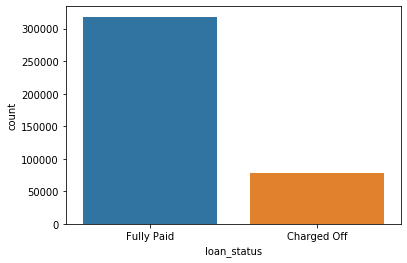

In [87]:
sns.countplot(x='loan_status',data=df)

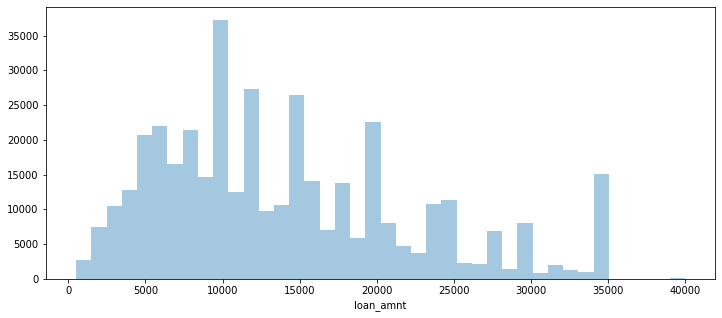

In [88]:
plt.figure(figsize=(12,5))
sns.distplot(df['loan_amnt'],kde=False,bins=40)

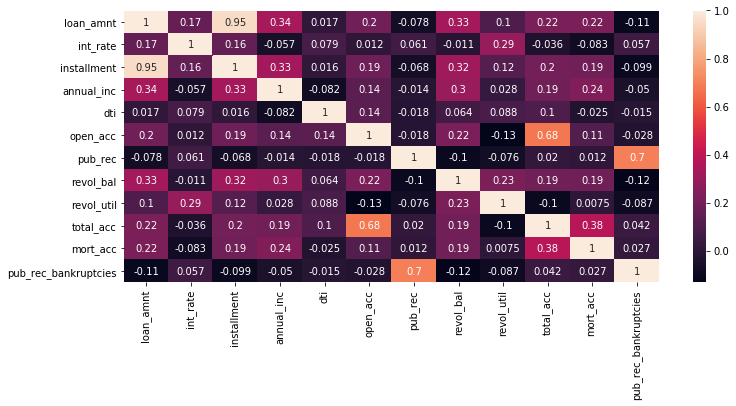

In [89]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),annot=True)

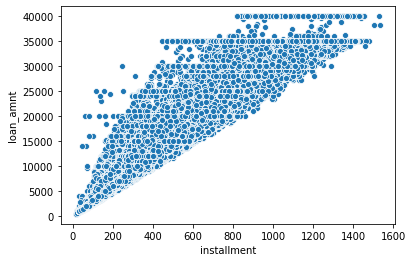

In [90]:
sns.scatterplot(x='installment',y='loan_amnt',data=df,)

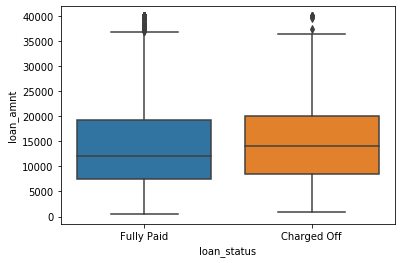

In [91]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [92]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [93]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [94]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

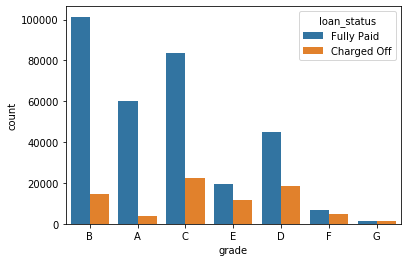

In [95]:
sns.countplot(x='grade',data=df,hue='loan_status')

In [96]:
plt.figure(figsize=(12,5))
subgrade_order = sorted(df['sub_grade'].unique())

<Figure size 864x360 with 0 Axes>

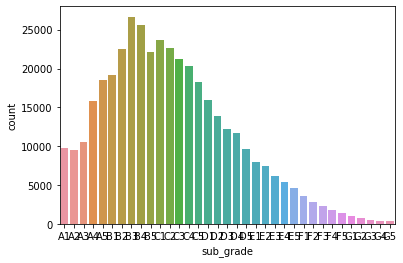

In [97]:
sns.countplot(x='sub_grade',data=df,order = subgrade_order)

In [98]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [99]:
df[['loan_status','loan_repaid']]

,loan_status,loan_repaid
0,Fully Paid,1
1,Fully Paid,1
2,Fully Paid,1
3,Fully Paid,1
4,Charged Off,0
...,...,...
396025,Fully Paid,1
396026,Fully Paid,1
396027,Fully Paid,1
396028,Fully Paid,1


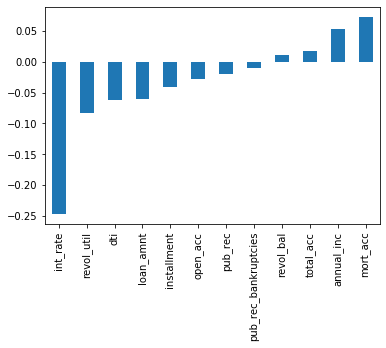

In [100]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

DATA MISSING

In [101]:
len(df)

396030

In [102]:
100*df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [103]:
feat_info('emp_title')
print('\n')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [104]:
df['emp_title'].nunique()

173105

In [105]:
df['emp_title'].value_counts()

Teacher                            4389
Manager                            4250
Registered Nurse                   1856
RN                                 1846
Supervisor                         1830
                                   ... 
navigation solutions                  1
Medical Assembler                     1
pt registration                       1
Partner - Technology Consultant       1
Legal Operations Specialist           1
Name: emp_title, Length: 173105, dtype: int64

In [106]:
df = df.drop('emp_title',axis=1)

In [107]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [108]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

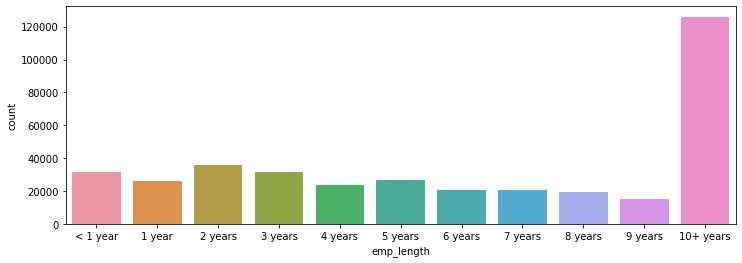

In [109]:
plt.figure(figsize=(12,4))

sns.countplot(x='emp_length',data=df,order=emp_length_order)

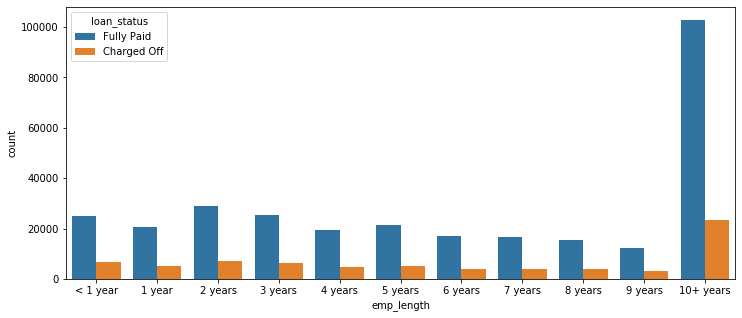

In [110]:
plt.figure(figsize=(12,5))
sns.countplot(x='emp_length',data=df,order=emp_length_order,hue='loan_status')

In [111]:
emp_co = df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']
emp_fp = df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']

In [112]:
epm_av = emp_co/emp_fp
epm_av

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

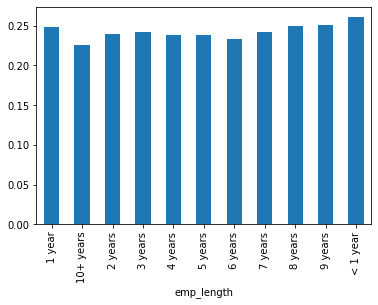

In [113]:
epm_av.plot(kind='bar')

In [114]:
df = df.drop('emp_length',axis=1)

In [115]:
df = df.drop('title',axis=1)

In [116]:
feat_info('mort_acc')

Number of mortgage accounts.


In [117]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [118]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [119]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [120]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [121]:
df['mort_acc'] =  df.apply(lambda x : fill_mort_acc(x['total_acc'],x['mort_acc']), axis=1)

In [122]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

Categorical and dummies entry 

In [123]:
#finding all non-numerical
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [124]:
df['term'].value_counts()

 36 months    302005
 60 months     94025
Name: term, dtype: int64

In [128]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [129]:
df = df.drop('grade',axis=1)

In [130]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [132]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [133]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [134]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose']],drop_first=True)

In [136]:
df = pd.concat([df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1),dummies],axis=1)

In [137]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

In [138]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [139]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [140]:
df = df.drop('issue_d',axis=1)

In [208]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

KeyError: 'earliest_cr_line'

In [260]:
from sklearn.model_selection import train_test_split

In [250]:
df = df.drop('loan_status',axis=1)
 

KeyError: "['loan_status'] not found in axis"

In [261]:
df = df.dropna(how='any')  

In [262]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [263]:
print(len(y))

395219


In [264]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [271]:
from sklearn.preprocessing import MinMaxScaler

In [272]:
scaler = MinMaxScaler()

In [273]:
X_train = scaler.fit_transform(X_train)

In [274]:
X_test = scaler.transform(X_test)

In [275]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [276]:
model = Sequential()

model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [277]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test,y_test), 
          )

Train on 316175 samples, validate on 79044 samples
Epoch 1/25
316175/316175 [==============================] - 13s 40us/sample - loss: 0.2999 - val_loss: 113031.8372
Epoch 2/25
316175/316175 [==============================] - 8s 25us/sample - loss: 0.2657 - val_loss: 191370.1369
Epoch 3/25
316175/316175 [==============================] - 7s 22us/sample - loss: 0.2630 - val_loss: 241552.4014
Epoch 4/25
316175/316175 [==============================] - 7s 21us/sample - loss: 0.2618 - val_loss: 264106.5979
Epoch 5/25
316175/316175 [==============================] - 7s 23us/sample - loss: 0.2611 - val_loss: 296138.1347
Epoch 6/25
316175/316175 [==============================] - 7s 24us/sample - loss: 0.2604 - val_loss: 306979.7510
Epoch 7/25
316175/316175 [==============================] - 8s 24us/sample - loss: 0.2601 - val_loss: 268977.0243
Epoch 8/25
316175/316175 [==============================] - 8s 24us/sample - loss: 0.2595 - val_loss: 301516.8401
Epoch 9/25
316175/316175 [==========

In [278]:
from tensorflow.keras.models import load_model

In [279]:
model.save('full_data_project_solution.h5') 

In [280]:
losses = pd.DataFrame(model.history.history)

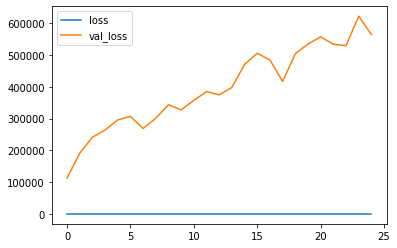

In [281]:
losses[['loss','val_loss']].plot()

In [282]:
from sklearn.metrics import classification_report,confusion_matrix

In [283]:
predictions = model.predict_classes(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     15658
           1       0.80      1.00      0.89     63386

    accuracy                           0.80     79044
   macro avg       0.40      0.50      0.45     79044
weighted avg       0.64      0.80      0.71     79044



C:\Users\rahul sudhakar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [285]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))
print(random_ind)

304691


In [286]:
new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 78, dtype: float64

In [287]:
new_customer = scaler.transform(new_customer.values.reshape(1,78))

In [288]:
model.predict(new_customer)

array([[1.]], dtype=float32)

In [289]:
df.iloc[random_ind]['loan_repaid']

1.0

In [270]:

print(np.any(np.isnan(X_train)))
print(np.any(np.isnan(X_test)))


False
False


In [249]:
X_train[:15]

array([[0.13924051, 0.        , 0.40085703, ..., 0.        , 0.        ,
        0.79710145],
       [0.26582278, 0.        , 0.28710557, ..., 0.        , 0.        ,
        0.73913043],
       [0.30379747, 1.        , 0.55317491, ..., 0.        , 0.        ,
        0.8115942 ],
       ...,
       [0.18987342, 0.        , 0.28398909, ..., 0.        , 0.        ,
        0.84057971],
       [0.15189873, 0.        , 0.22088041, ..., 0.        , 0.        ,
        0.85507246],
       [0.16392405, 0.        , 0.0455785 , ..., 0.        , 0.        ,
        0.5942029 ]])